In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time

In [21]:
X = pd.read_table("q4/q4x.dat", sep = "\s+", header = None)
Y = pd.read_csv("q4/q4y.dat", sep = "\s+", header = None)

X.columns = ["x0", "x1"]

In [22]:
# normalising x values
x1_mean = np.mean(X["x1"])
x1_std = np.std(X["x1"])
x2_mean = np.mean(X["x0"])
x2_std = np.std(X["x0"])
X["x1"] = (X["x1"] - x1_mean)/x1_std
X["x0"] = (X["x0"] - x2_mean)/x2_std

In [23]:
X_data = X[["x0", "x1"]].to_numpy()
Y_data = Y.to_numpy()

Y_data[Y == "Alaska"] = 0
Y_data[Y == "Canada"] = 1

In [24]:
y0_list = [i for i in range(0, Y_data.shape[0]) if Y_data[i] == 0]
y1_list = [i for i in range(0, Y_data.shape[0]) if Y_data[i] == 1]
mu_0 = np.mean(X_data[y0_list], axis = 0).reshape(1,2)
mu_1 = np.mean(X_data[y1_list], axis = 0).reshape(1,2)

cov = np.zeros((2,2))
cov_0 = np.zeros((2,2))
cov_1 = np.zeros((2,2))

for i in range(0, X_data.shape[0]):
  if(Y_data[i] == 1):
    var = X_data[i:i+1] - mu_1
    cov_1 = cov_1 + np.dot(var.T, var)
  else:
    var = X_data[i:i+1] - mu_0
    cov_0 = cov_0 + np.dot(var.T, var)
cov = (cov_0 + cov_1)/X.shape[0]
cov_1 = cov_1/len(y1_list)
cov_0 = cov_0/len(y0_list)

In [25]:
phi = len(y1_list)/X.shape[0]

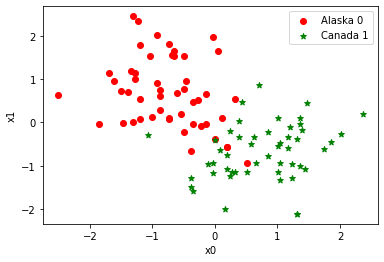

In [26]:
fig = plt.figure()
plt.scatter(X["x0"][y0_list], X["x1"][y0_list], color = "red", marker = "o", label = "Alaska 0")
plt.scatter(X["x0"][y1_list], X["x1"][y1_list], color = "green", marker = "*", label = "Canada 1")
plt.legend()
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

In [27]:
inv = np.linalg.inv(cov)
a = np.dot(inv, (mu_1 - mu_0).T)
b = (1/2)*(np.dot(mu_1, np.dot(inv, mu_1.T)) - np.dot(mu_0, np.dot(inv, mu_0.T)))
C_equal = np.log((1-phi)/phi)

In [28]:
x0 = np.linspace(min(X["x0"]) - 1, max(X["x0"]) + 1, 30)
x1 = np.linspace(min(X["x1"]) - 1, max(X["x1"]) + 1, 30)

X0, X1 = np.meshgrid(x0, x1)

def f_linear(x0,x1):
  return a[0]*x0 + a[1]*x1 - b - C_equal

Y_linear = f_linear(X0, X1)

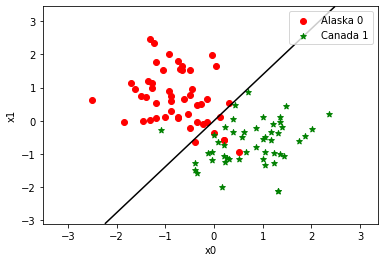

In [33]:
fig = plt.figure()
plt.scatter(X["x0"][y0_list], X["x1"][y0_list], color = "red", marker = "o", label = "Alaska 0")
plt.scatter(X["x0"][y1_list], X["x1"][y1_list], color = "green", marker = "*", label = "Canada 1")
plt.contour(X0, X1, Y_linear, [0], colors = "k")
plt.legend()
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

In [13]:
inv_0 = np.linalg.inv(cov_0)
inv_1 = np.linalg.inv(cov_1)
det_0 = np.linalg.det(inv_0)
det_1 = np.linalg.det(inv_1)


a = (1/2)*(inv_1 - inv_0)
b = np.dot(inv_1, mu_1.T) - np.dot(inv_0, mu_0.T)
C = np.log((1-phi)*det_1/(phi*det_0))
d = (1/2)*(np.dot(mu_1, np.dot(inv_1, mu_1.T)) - np.dot(mu_0, np.dot(inv_0, mu_0.T)))

In [15]:
x0 = np.linspace(min(X["x0"]) - 1, max(X["x0"]) + 1, 30)
x1 = np.linspace(min(X["x1"]) - 1, max(X["x1"]) + 1, 30)

X0, X1 = np.meshgrid(x0, x1)

def f_quadratic(x0, x1):
  return x0*x0*a[0,0] + x0*x1*(a[1,0]+a[0,1]) + x1*x1*a[1,1] - b[0]*x0 - b[1]*x1 + d + C

Y_quadratic = f_quadratic(X0, X1)

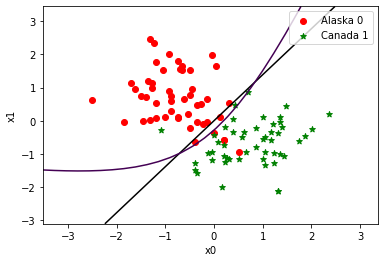

In [34]:
fig = plt.figure()
plt.scatter(X["x0"][y0_list], X["x1"][y0_list], color = "red", marker = "o", label = "Alaska 0")
plt.scatter(X["x0"][y1_list], X["x1"][y1_list], color = "green", marker = "*", label = "Canada 1")
plt.contour(X0, X1, Y_linear, [0], colors = "k")
plt.contour(X0, X1, Y_quadratic, [0])
plt.legend()
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()